<a href="https://colab.research.google.com/github/emilianolel/Proyecto_BEDU_Equipo_5/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROYECTO


* ## INICIO DEL PROYECTO

* ### IMPORTACIÓN DE LIBRERÍAS

Una vez que generamos nuestras preguntas, obtuvimos una base de datos correspondiente a una muestra poblacional de la India, donde los participantes son en su totalidad mujeres.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

* ### LECTURA DE DATA SET

Ya con nuestros datos, pasamos a hacer uso de pandas para leer los valores y obtener nuestro Data Frame. Imprimimos nuestra tabla y hacemos un análisis rápido de los valores que tenemos y sus columnas.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/diabetes2.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,8,183.0,64.0,NaN,0,23.3,0.672,32,1
2,0,137.0,40.0,35.0,168,43.1,2.288,33,1
3,3,78.0,50.0,32.0,88,31.0,0.248,26,1
4,2,197.0,70.0,45.0,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
763,9,89.0,62.0,NaN,0,22.5,0.142,33,0
764,10,101.0,76.0,48.0,180,32.9,0.171,63,0
765,2,122.0,70.0,27.0,0,36.8,0.340,27,0
766,5,121.0,72.0,23.0,112,26.2,0.245,30,0


Por medio de la función .info() verificamos que tipo de datos contiene cada una de nuestras columnas y a su vez verificamos si existen valores nulos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


* ### LIMPIEZA DE DATOS

Debido a que nuestro data set no es muy amplio, queremos conservar todos los datos para poder analizar mejor, por ello en una nueva variable pasaremos el mismo Data Frame y llenaremos los NAN con 0.

In [ ]:
df2 = df.fillna(0)
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,8,183.0,64.0,0.0,0,23.3,0.672,32,1
2,0,137.0,40.0,35.0,168,43.1,2.288,33,1
3,3,78.0,50.0,32.0,88,31.0,0.248,26,1
4,2,197.0,70.0,45.0,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
763,9,89.0,62.0,0.0,0,22.5,0.142,33,0
764,10,101.0,76.0,48.0,180,32.9,0.171,63,0
765,2,122.0,70.0,27.0,0,36.8,0.340,27,0
766,5,121.0,72.0,23.0,112,26.2,0.245,30,0


Hecho esto, podemos realizar operaciones en las columnas que detectamos existen los NAN y que impactaría de forma negativa tener estos valores como ceros. Por ello, decidimos obtener el promedio de cada columna para después sustituir este valor por nuestros ceros sin que cree una repercusión en nuestro análisis.

In [ ]:
df2.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

In [ ]:
df2["Glucose"].mean()

120.89453125

In [ ]:
df2["BloodPressure"].mean()

69.10546875

In [ ]:
df2["SkinThickness"].mean()

20.536458333333332

In [ ]:
df2["BMI"].mean()

31.992578124999966

Ya que obtuvimos estos datos, los guardaremos en un diccionario y se los pasaremos como parámetro a la función de fillna() para crear un nuevo Data Frame que contenga los datos ya limpios.

In [ ]:
nan_values = {"Glucose": 120.8, "BloodPressure": 69.1, "SkinThickness": 20.5, "BMI": 31.9}
df_clean = df
df_clean = df_clean.fillna(value = nan_values)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


Con ayuda de la función describe() analizamos un poco nuestros datos, viendo valores máximos, mínimos, promedio, etc. de cada una de nuestras columnas.

In [ ]:
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.680990,72.254557,26.595703,79.799479,32.449479,0.471876,33.240885,0.348958
std,3.369578,30.436033,12.115997,9.638053,115.244002,6.875471,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.500000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* ### PRIMERAS AGRUPACIONES DE DATOS

Por medio de agrupaciones checamos el promedio de la edad de los casos positivos y negativos de diabetes que encontramos en nuestro data set.

In [ ]:
df_clean.groupby("Outcome")["Age"].agg(["mean"])

,mean
Outcome,
0,31.190000
1,37.067164


También realizamos una agrupación para contar los casos positivos y negativos por edad y saber cuantas personas pertenecen al mismo rango de años. Esta información más adelante nos servirá para generar algunas inferencias respecto a nuestros datos y preguntas generadas.

In [ ]:
edades = df_clean.groupby("Outcome")["Age"].value_counts()
edades

Outcome  Age
0        22     61
         21     58
         24     38
         25     34
         23     31
                ..
1        55      1
         57      1
         61      1
         67      1
         70      1
Name: Age, Length: 96, dtype: int64

Finalmente, almacenamos nuestro Data Frame limpio en un archivo csv para posteriormente utilizarlo en nuestros análisis. 

In [ ]:
df_clean.to_csv("clean_data.csv")

* ### CREACION DE NUEVA COLUMNA PARA ANÁLISIS

Ahora, hemos observado que tenemos una columna que nos dice el índice de masa corporal, sin embargo, no es muy cómodo verlo como un número. Este valor nos indica en que rango de peso se encuentra una persona respecto a su estatura, ya sea bajo de peso, normal, elevado sobre lo normal u obesidad. Por ello queremos crear una nueva columna que nos indique por medio de un string a cuál de las categorías anteriores pertenece cada uno de los pacientes de nuestro data set.

In [ ]:
df_clean.groupby("Outcome")["BMI"].max()

Outcome
0    57.3
1    67.1
Name: BMI, dtype: float64

Para ello, creamos una función la cual compara el valor “BMI” de cada fila y dependiendo en el valor que tenga, se le asignara la categoría a la que pertenece.

In [ ]:
def ComposicionCorporal(row):
  if row["BMI"] <= 18.5:
    return "Bajo"
  if row["BMI"] > 18.5 and row["BMI"] <= 24.9:
    return "Normal"
  if row["BMI"] >= 25 and row["BMI"] <= 29.9:
    return "Elevado"
  if row["BMI"] >= 30:
    return "Obesidad"   

Una vez creada nuestra función, le diremos a nuestro Data Frame que creé una columna nueva llamada “ComposicionCorporal” y por medio de apply pasamos una función lambda que verifique cada una de las filas que tenemos y agregue su respectivo valor en la nueva columna.

In [ ]:
df_clean["ComposicionCorporal"] = df_clean.apply(lambda row: ComposicionCorporal(row), axis=1)

Checamos rápidamente nuestro Data Frame y vemos que ya tenemos nuestra nueva columna y explorando un poco los datos vemos que si corresponden a los valores que programamos.

In [ ]:
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ComposicionCorporal
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1,Obesidad
1,8,183.0,64.0,20.5,0,23.3,0.672,32,1,Normal
2,0,137.0,40.0,35.0,168,43.1,2.288,33,1,Obesidad
3,3,78.0,50.0,32.0,88,31.0,0.248,26,1,Obesidad
4,2,197.0,70.0,45.0,543,30.5,0.158,53,1,Obesidad
...,...,...,...,...,...,...,...,...,...,...
763,9,89.0,62.0,20.5,0,22.5,0.142,33,0,Normal
764,10,101.0,76.0,48.0,180,32.9,0.171,63,0,Obesidad
765,2,122.0,70.0,27.0,0,36.8,0.340,27,0,Obesidad
766,5,121.0,72.0,23.0,112,26.2,0.245,30,0,Elevado


Guardamos este nuevo Data Frame en otro csv para su posterior análisis. 

In [ ]:
df_clean.to_csv("Corporal_data.csv")

* ## DESARROLLO DE ANÁLISIS

* ### IMPORTACIÓN DE LIBRERÍAS

Comenzamos importando nuestras librerías, en este caso haremos uso de seaborn y matplotlib que son librerías que nos permiten generar gráficos, además de usar pandas para nuestro análisis de manipulación de datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* ### LECTURA Y ESTRUCTURA DE DATOS

Leemos nuestro archivo csv de Corporal_data que previamente creamos, el cual ya contiene nuestros datos limpios y la nueva columna que creamos.

In [2]:
diabetes_df = pd.read_csv('https://github.com/emilianolel/Proyecto_BEDU_Equipo_5/raw/main/Datasets/Corporal_data.csv')
print(diabetes_df.columns) 

Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome', 'ComposicionCorporal'],
      dtype='object')


Vemos la estructura de nuestros datos para ver que estén bien y que sus dimensiones sean las correctas.

In [3]:
diabetes_df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ComposicionCorporal
0,0,6,148.0,72.0,35.0,0,33.6,0.627,50,1,Obesidad
1,1,8,183.0,64.0,20.5,0,23.3,0.672,32,1,Normal
2,2,0,137.0,40.0,35.0,168,43.1,2.288,33,1,Obesidad
3,3,3,78.0,50.0,32.0,88,31.0,0.248,26,1,Obesidad
4,4,2,197.0,70.0,45.0,543,30.5,0.158,53,1,Obesidad


In [4]:
diabetes_df.shape

(768, 11)

* ### ANÁLISIS DE DATOS Y AGRUPACIONES

Creamos una agrupación para la columna “Outcome” la cual nos indica si el paciente tiene diabetes (1) o si salió negativo (0). Y creamos un grafico para observar nuestro resultado.

In [5]:
diabetes_df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


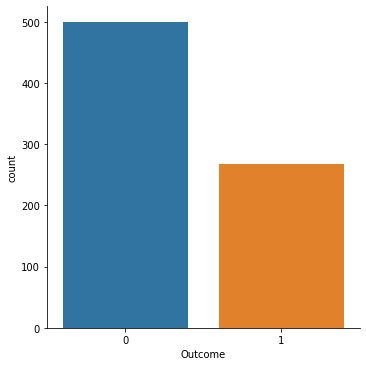

In [6]:
sns.catplot("Outcome", data=diabetes_df, kind = "count")

De igual manera, generamos una agrupación para saber las edades de los pacientes y el numero de veces que se repite cada edad para ver si encontramos alguna tendencia.

In [7]:
diabetes_df.groupby('Age').size()

Age
21    63
22    72
23    38
24    46
25    48
26    33
27    32
28    35
29    29
30    21
31    24
32    16
33    17
34    14
35    10
36    16
37    19
38    16
39    12
40    13
41    22
42    18
43    13
44     8
45    15
46    13
47     6
48     5
49     5
50     8
51     8
52     8
53     5
54     6
55     4
56     3
57     5
58     7
59     3
60     5
61     2
62     4
63     4
64     1
65     3
66     4
67     3
68     1
69     2
70     1
72     1
81     1
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


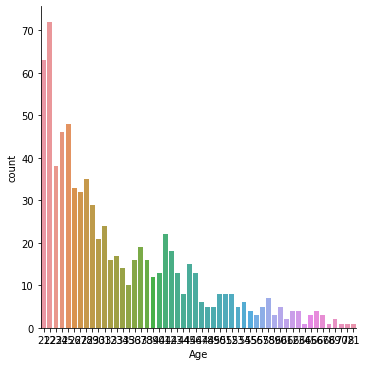

In [8]:
sns.catplot("Age", data=diabetes_df, kind = "count")

Hecho esto, crearemos dos variables, una para los pacientes que dieron positivo a diabetes y la llamaremos “diabetes_confirmado_df” y otra variable para los pacientes que dieron negativo llamado “diabetes_negado_df” y con esto podremos hacer nuevos análisis a nuestros datos.

In [9]:
diabetes_confirmado_df = diabetes_df[diabetes_df['Outcome'] != 0]
diabetes_confirmado_df.groupby('Age').size()

Age
21     5
22    11
23     7
24     8
25    14
26     8
27     8
28    10
29    13
30     6
31    13
32     9
33    10
34     4
35     5
36    10
37     6
38    10
39     3
40     6
41    13
42     7
43    11
44     5
45     8
46     7
47     4
48     1
49     3
50     5
51     5
52     7
53     4
54     4
55     1
56     2
57     1
58     3
59     2
60     2
61     1
62     2
66     2
67     1
70     1
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


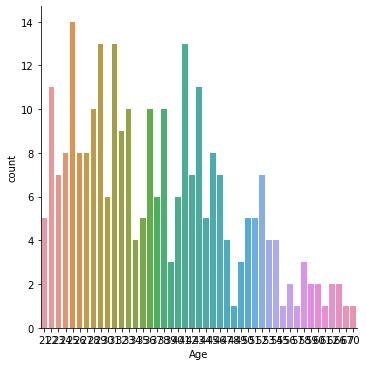

In [10]:
sns.catplot("Age", data=diabetes_confirmado_df, kind = "count")

In [11]:
diabetes_negado_df = diabetes_df[diabetes_df['Outcome'] != 1]
diabetes_negado_df.groupby('Age').size()

Age
21    58
22    61
23    31
24    38
25    34
26    25
27    24
28    25
29    16
30    15
31    11
32     7
33     7
34    10
35     5
36     6
37    13
38     6
39     9
40     7
41     9
42    11
43     2
44     3
45     7
46     6
47     2
48     4
49     2
50     3
51     3
52     1
53     1
54     2
55     3
56     1
57     4
58     4
59     1
60     3
61     1
62     2
63     4
64     1
65     3
66     2
67     2
68     1
69     2
72     1
81     1
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


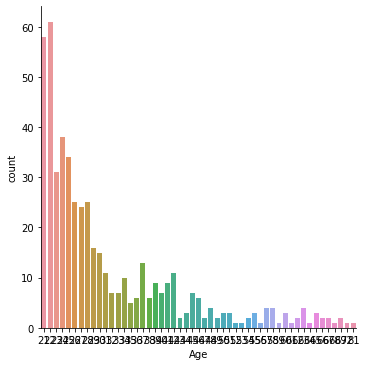

In [12]:
sns.catplot("Age", data=diabetes_negado_df, kind = "count")

* ### GRÁFICOS DE DATOS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


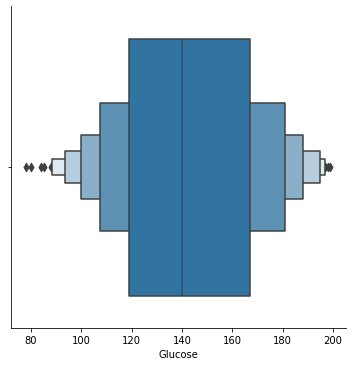

In [13]:
sns.catplot("Glucose", data=diabetes_confirmado_df, kind = "boxen")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


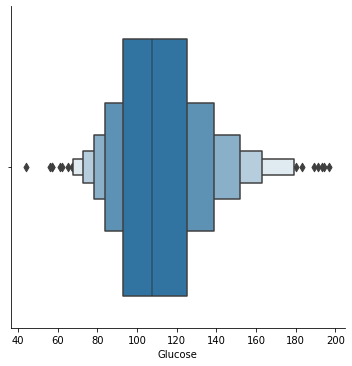

In [14]:
sns.catplot("Glucose", data=diabetes_negado_df, kind = "boxen")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


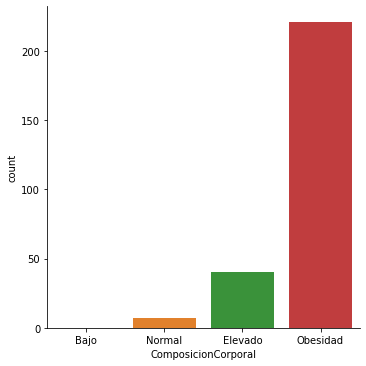

In [15]:
sns.catplot("ComposicionCorporal", data=diabetes_confirmado_df, kind = "count",order=["Bajo","Normal","Elevado","Obesidad"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


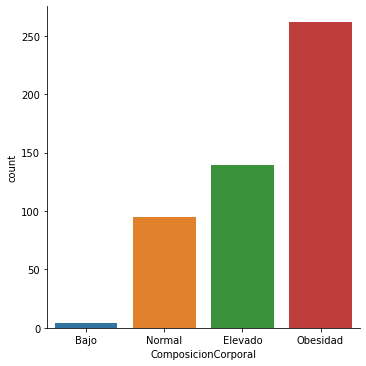

In [16]:
sns.catplot("ComposicionCorporal", data=diabetes_negado_df, kind = "count",order=["Bajo","Normal","Elevado","Obesidad"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


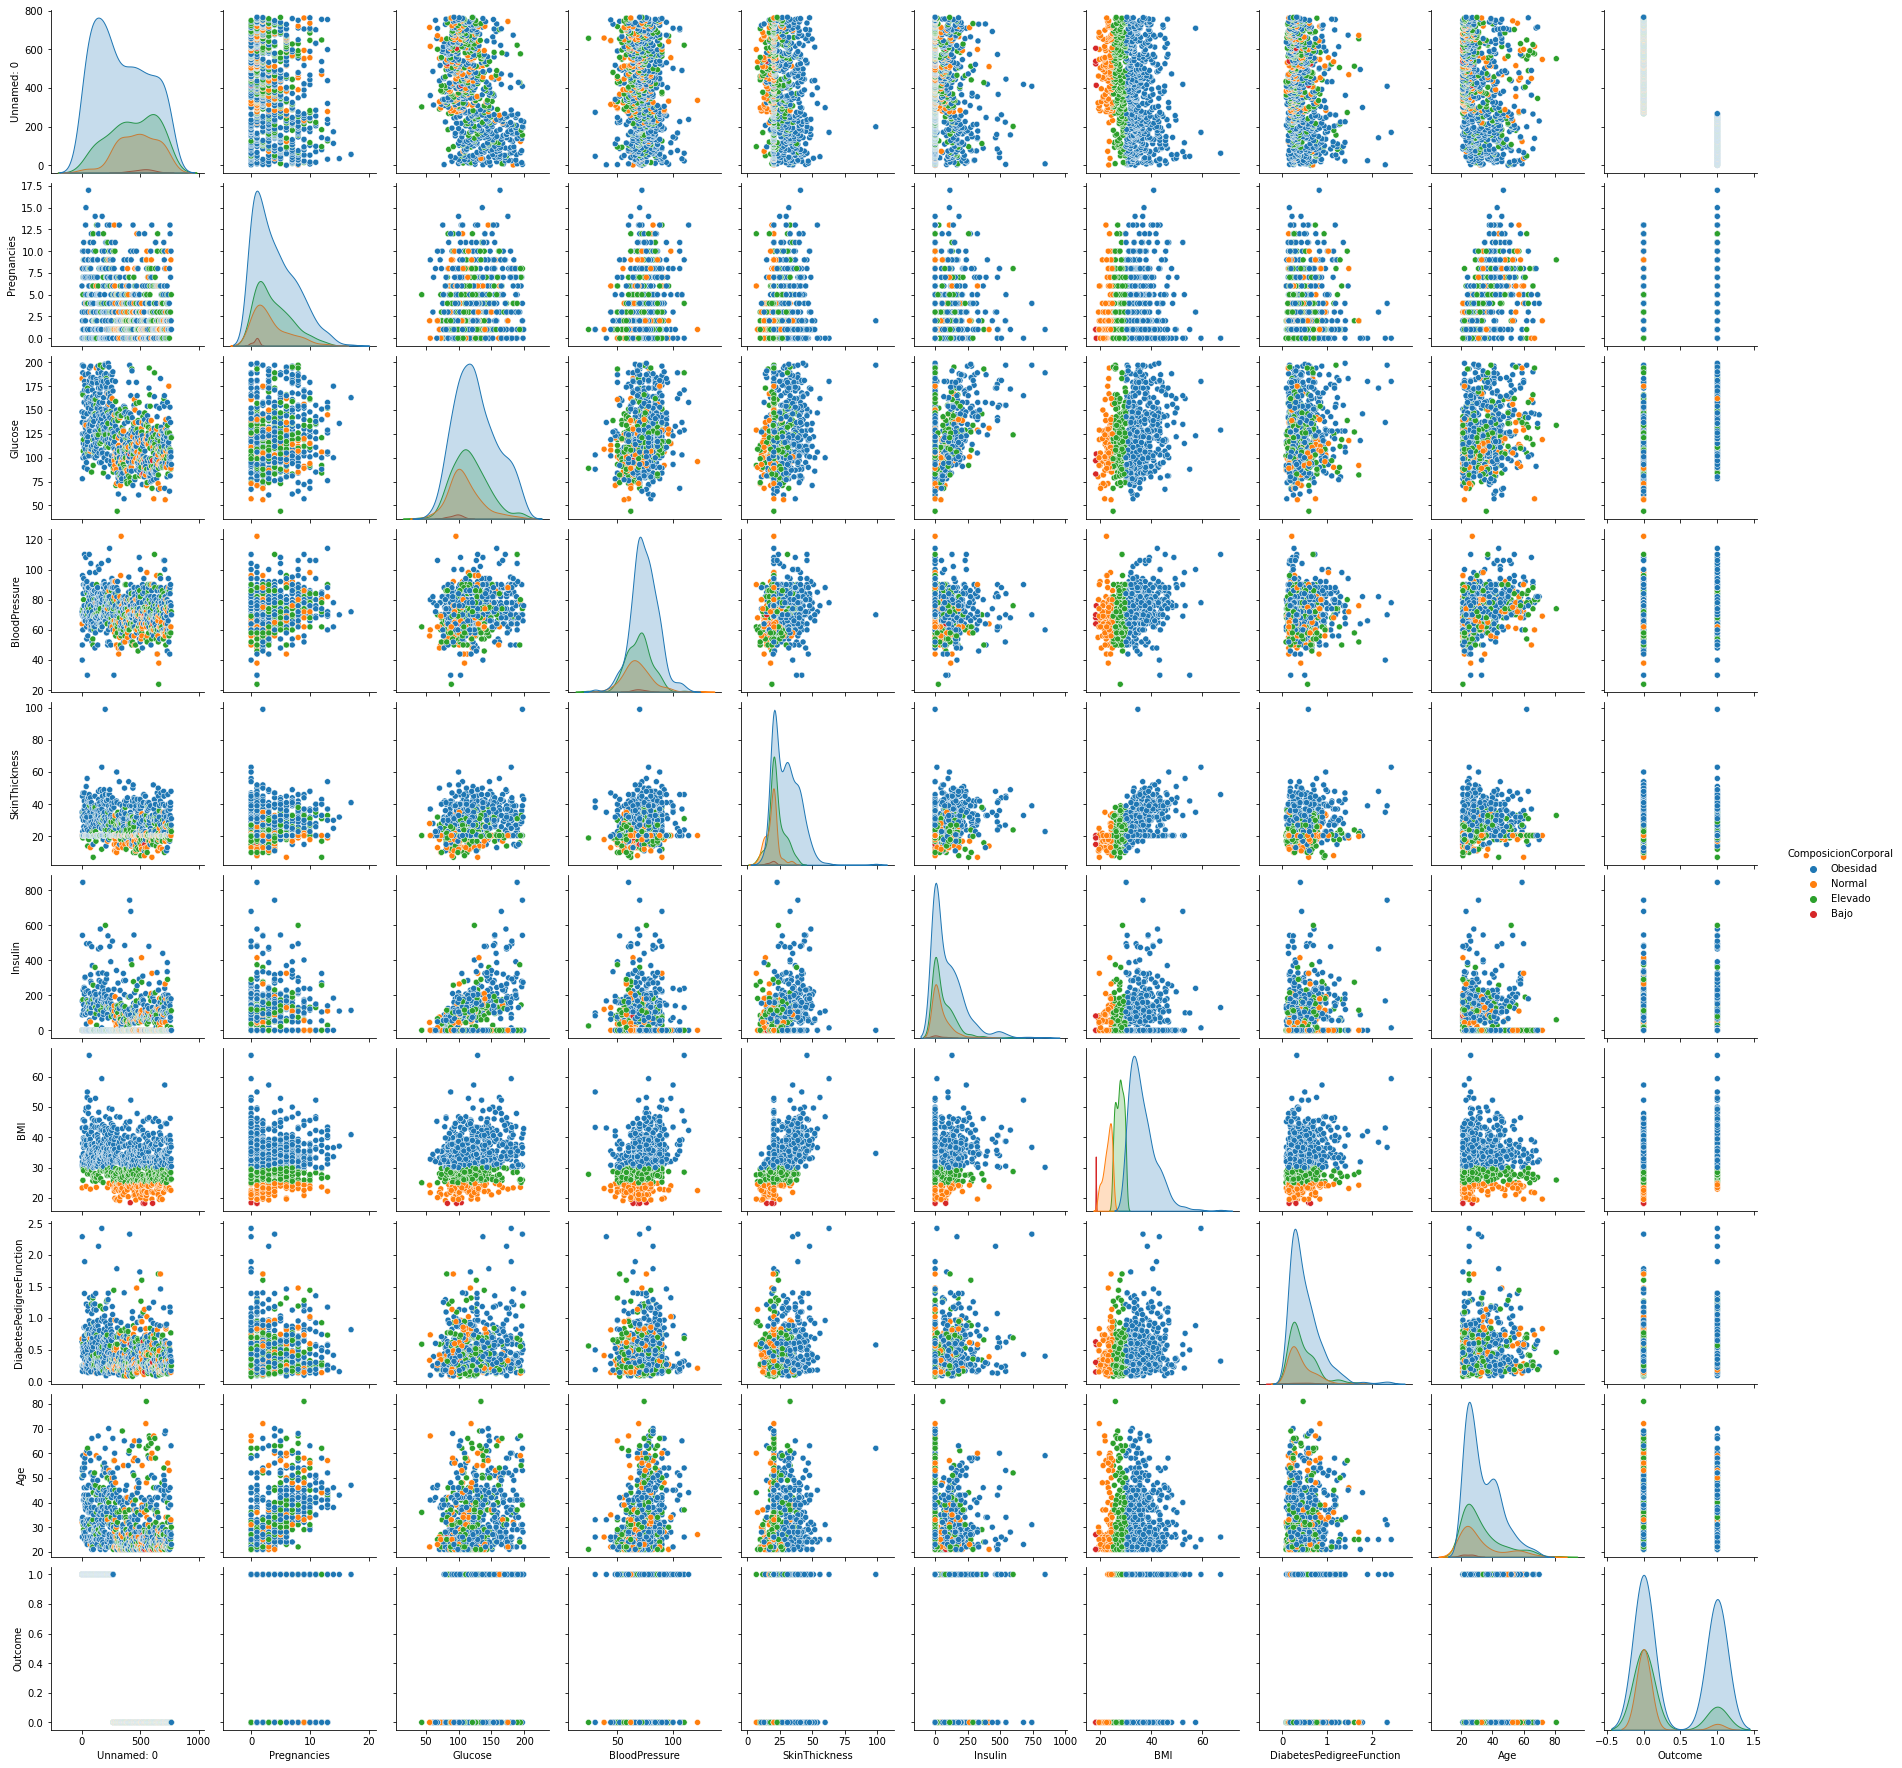

In [17]:
sns.pairplot(diabetes_df, hue = 'ComposicionCorporal')

In [ ]:
sns.pairplot(diabetes_df, hue = 'Outcome')